# KNN

In [68]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML 101.1-20230219T101028Z-001 (3)/ML 101.1/data/car.data", names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"])
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


2.1 eliminare dal dataset le colonne o i dati inutili se presenti

2.2 modificare, se necessario, i dati presenti per poter utilizzare senza problemi i metodi oggetto della verifica

In [69]:
df["buying"].replace({"low": 0, "med": 1, "high" : 2, "vhigh" : 3}, inplace = True)
df["maint"].replace({"low": 0, "med": 1, "high" : 2, "vhigh" : 3}, inplace = True)
df["doors"].replace({"5more": 5}, inplace = True)
df["persons"].replace({"more": 5}, inplace = True)
df["lug_boot"].replace({"small": 0, "med": 1, "big" : 2}, inplace = True)
df["safety"].replace({"low": 0, "med": 1, "high" : 2}, inplace = True)
df["class"].replace(["unacc", "acc", "good", "vgood"], [0, 1, 2, 3], inplace = True)

# df["persons"] = df["persons"].astype(int)
# df["safety"] = df["safety"].astype(int)
df = df.astype(int)
df = df.dropna().reset_index(drop=True)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,2
1724,0,0,5,5,1,2,3
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,2


In [70]:
print(df.groupby('class').size())

class
0    1210
1     384
2      69
3      65
dtype: int64


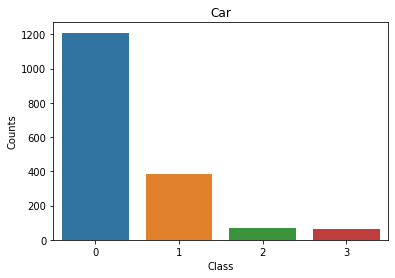

In [71]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="class", data=df)
plt.title("Car")
plt.xlabel("Class")
plt.ylabel("Counts")
plt.show()

2.3. provare a utilizzare l'algoritmo K-NN con diversi valori di K per classificare i dati. Inserire nel notebook le varie prove effettuate spiegando qual è il valore di K migliore e perché.

In [72]:
import numpy as np
dfnp = df.to_numpy()
x=dfnp[:,:-1] #variabili indipendenti
y=dfnp[:,-1] #variabile dipendente

#Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({0: 1210, 1: 384, 3: 65, 2: 69})

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [74]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1209, 6), (1209,), (519, 6), (519,))

In [75]:
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[2 0 3 5 1 1]
 [0 3 3 2 1 1]
 [2 3 3 5 1 1]
 [3 1 4 4 0 0]
 [0 0 3 2 2 1]
 [3 1 4 5 1 2]
 [3 2 5 4 1 0]
 [3 1 5 4 1 0]
 [1 2 4 5 1 1]
 [1 3 4 4 1 2]]
y_train = [1 0 0 0 0 1 0 0 1 1]


In [76]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

# inizializziamo il metodo
neigh = KNeighborsClassifier(n_neighbors=5)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict = neigh.predict(X_test)

# e visualizziamo il risultato (solo i primi dieci vini)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 3 0 1 1 0 0 0 3 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


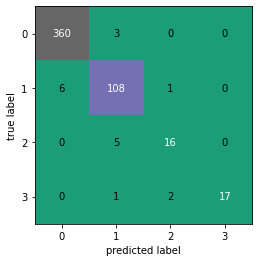

In [77]:
# visualizziamo la confusion matrix

from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap = plt.cm.Dark2)
plt.show()

In [78]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       363
           1       0.92      0.94      0.93       115
           2       0.84      0.76      0.80        21
           3       1.00      0.85      0.92        20

    accuracy                           0.97       519
   macro avg       0.94      0.89      0.91       519
weighted avg       0.97      0.97      0.96       519



2.5 scrivere il codice necessario per trovare il miglior valore di K. Provare poi il metodo con quel valore.  

Maximum accuracy:  0.9653179190751445 at K = 5


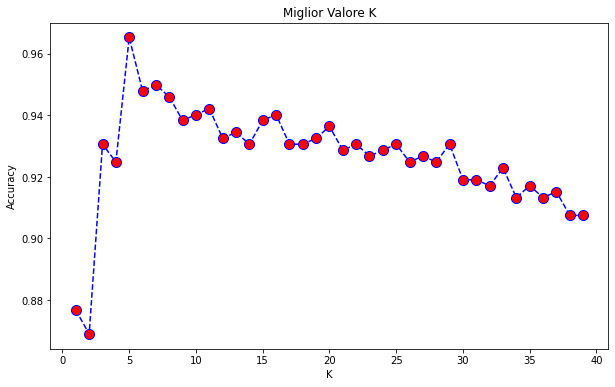

In [49]:
#modo per individuare la miglior K
acc = []
from sklearn import metrics
for k in range(1,40):
  neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
  predict = neigh.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Miglior Valore K')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",acc.index(max(acc)) + 1 )

In [50]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

# inizializziamo il metodo
neigh = KNeighborsClassifier(n_neighbors=5)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predict = neigh.predict(X_test)

# e visualizziamo il risultato (solo i primi dieci vini)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 3 0 1 1 0 0 0 3 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


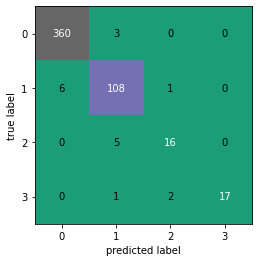

In [51]:
# visualizziamo la confusion matrix

from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap = plt.cm.Dark2)
plt.show()

In [52]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       363
           1       0.92      0.94      0.93       115
           2       0.84      0.76      0.80        21
           3       1.00      0.85      0.92        20

    accuracy                           0.97       519
   macro avg       0.94      0.89      0.91       519
weighted avg       0.97      0.97      0.96       519



**Per trovare la K migliore basandosi su "weighted":**

Maximum accuracy:- 0.9648667869251221 at K = 5


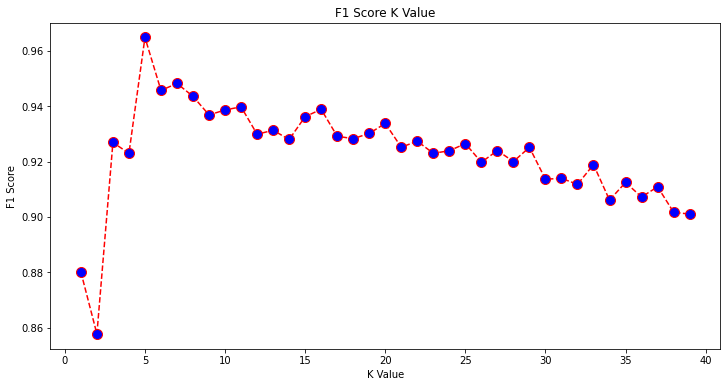

In [53]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
print("Maximum accuracy:-",max(f1s),"at K =",f1s.index(max(f1s)) + 1)

**Per trovare la K migliore basandosi su "macro":**

Maximum accuracy:- 0.9094019306662985 at K = 5


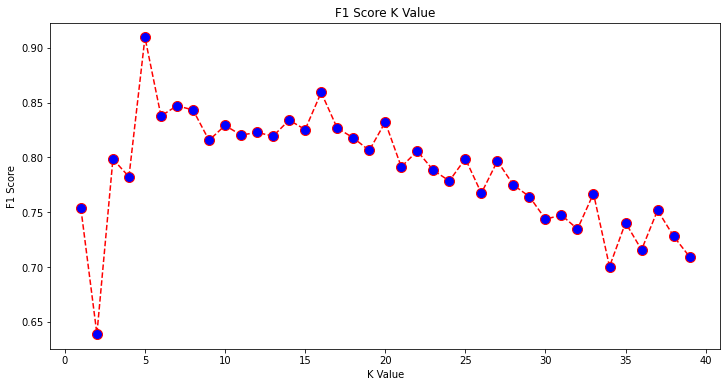

In [54]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='macro'))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
print("Maximum accuracy:-",max(f1s),"at K =",f1s.index(max(f1s)) + 1)

# Decision Tree

2.4 provare a utilizzare l'algoritmo decision tree con diversi valori dei parametri del metodo per classificare i dati. Inserire nel notebook le varie prove effettuate spiegando quali sono i valori dei parametri che meglio descrivono il fenomeno e perché. Visualizzare anche l'albero generato dal metodo

In [79]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 2 0 1 2 0 0 0 2 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


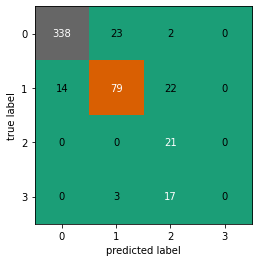

In [80]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt), cmap = plt.cm.Dark2)
plt.show()

In [81]:
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       363
           1       0.75      0.69      0.72       115
           2       0.34      1.00      0.51        21
           3       0.00      0.00      0.00        20

    accuracy                           0.84       519
   macro avg       0.51      0.65      0.54       519
weighted avg       0.85      0.84      0.84       519



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


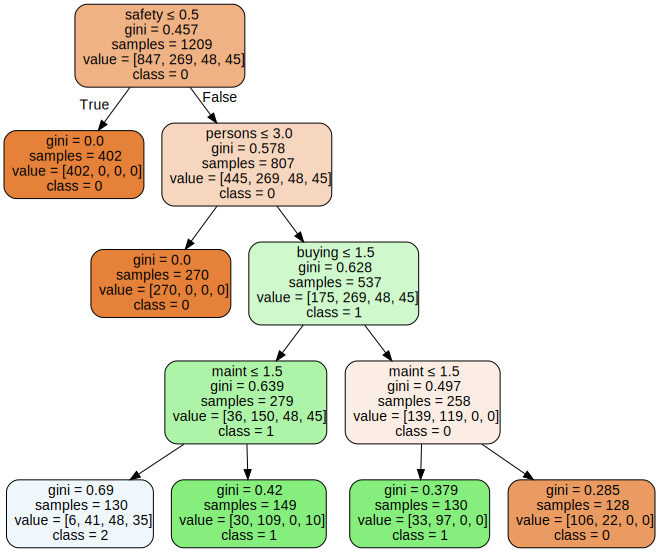

In [82]:
#save the feature list into a vector (sono i nomi delle colonne del dataset)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[:-1],  
                     class_names=['0', '1', '2', '3'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('Car')
graph

Maximum accuracy:  0.8439306358381503 at depth = 4


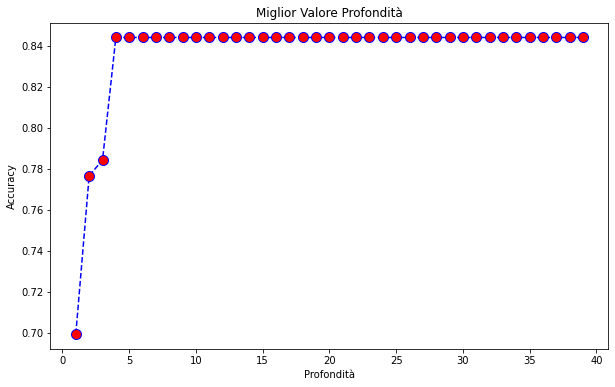

In [61]:
acc = []
# Will take some time
from sklearn import metrics
for d in range(1,40):
  tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth = d, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )
  # prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
  tree_clf.fit(X_train,y_train)

  # seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
  predict_dt = tree_clf.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, predict_dt))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Miglior Valore Profondità')
plt.xlabel('Profondità')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at depth =",acc.index(max(acc)) + 1 )

In [65]:
# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 2 0 1 2 0 0 0 2 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


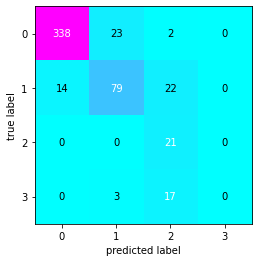

In [66]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt), cmap=plt.cm.cool)
plt.show() # DecisionTree

In [67]:
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       363
           1       0.75      0.69      0.72       115
           2       0.34      1.00      0.51        21
           3       0.00      0.00      0.00        20

    accuracy                           0.84       519
   macro avg       0.51      0.65      0.54       519
weighted avg       0.85      0.84      0.84       519



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confronto

2.5 fare un confronto tra i due metodi e dire quale è il migliore. Visualizzare le due confusion matrix e il classification report in modo che sia semplice per il lettore capire le motivazioni


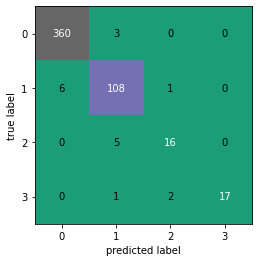

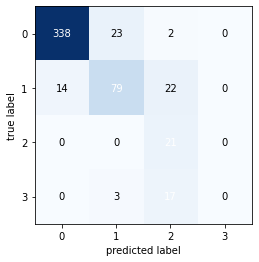

In [83]:
plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2) #KNN
plot_confusion_matrix(confusion_matrix(y_test, predict_dt)) #Decision Tree

plt.show()

In [84]:
print(classification_report(y_test, predict))

print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       363
           1       0.92      0.94      0.93       115
           2       0.84      0.76      0.80        21
           3       1.00      0.85      0.92        20

    accuracy                           0.97       519
   macro avg       0.94      0.89      0.91       519
weighted avg       0.97      0.97      0.96       519

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       363
           1       0.75      0.69      0.72       115
           2       0.34      1.00      0.51        21
           3       0.00      0.00      0.00        20

    accuracy                           0.84       519
   macro avg       0.51      0.65      0.54       519
weighted avg       0.85      0.84      0.84       519



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In questo caso è meglio il metodo KNN